In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
SRC_PATH="parsed"

In [2]:
def load_housing_data(src=SRC_PATH):
    csv_path = os.path.join(src, "src.csv")
    return pd.read_csv(csv_path)

In [3]:
df = load_housing_data()
df.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
0,Hammurabi,1103,45,44,97,15484,4.0,People
1,Hatshepsut,755,49,18,97,33266,3.0,People
2,Ramesses II,662,43,25,119,32507,2.0,People
3,Cyrus the Great,515,61,32,213,47616,2.0,People
4,Alexander the Great,1910,71,75,401,89053,4.0,People


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       998 non-null    object 
 1   Links       998 non-null    int64  
 2   Categories  998 non-null    int64  
 3   Images      998 non-null    int64  
 4   References  998 non-null    int64  
 5   Length      998 non-null    int64  
 6   Quality     997 non-null    float64
 7   Theme       998 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 62.5+ KB


In [5]:
df["Theme"].value_counts()

Science                         210
Society and social sciences     146
People                          112
Geography                       106
Technology                       98
History                          83
Everyday life                    57
Philosophy and religion          55
Arts                             45
Mathematics                      45
Health, medicine and disease     41
Name: Theme, dtype: int64

In [6]:
df.describe()

,Links,Categories,Images,References,Length,Quality
count,998.000000,998.000000,998.000000,998.000000,998.000000,997.000000
mean,859.871743,38.109218,41.362725,218.013026,50315.901804,2.749248
std,513.129578,25.571013,37.425723,181.221618,25837.048931,0.959685
min,99.000000,7.000000,2.000000,6.000000,7047.000000,1.000000
25%,477.000000,21.000000,21.000000,86.000000,30272.000000,2.000000
50%,733.000000,30.000000,31.000000,157.000000,46976.500000,3.000000
75%,1140.750000,44.000000,48.750000,297.750000,63421.500000,3.000000
max,3662.000000,153.000000,339.000000,1310.000000,165877.000000,5.000000


In [7]:
corr_matrix = df.corr()

<AxesSubplot:>

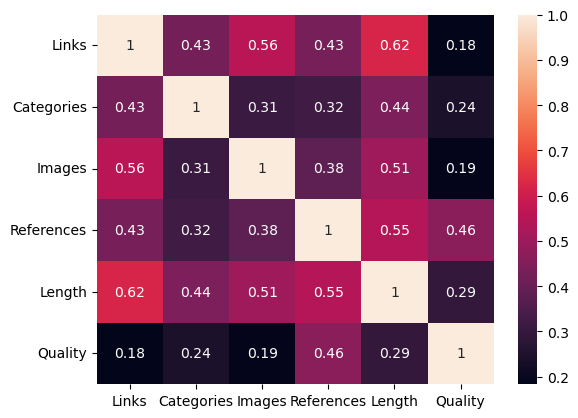

In [8]:
sns.heatmap(corr_matrix, annot=True)

In [9]:
# Alternative way of filtering
# df_filtered = df[df["Theme"] == "Arts"]

df_filtered_just_arts = df.query("Theme == 'Arts'")
df_filtered_just_arts.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [10]:
categories = sorted(set(df['Theme']))

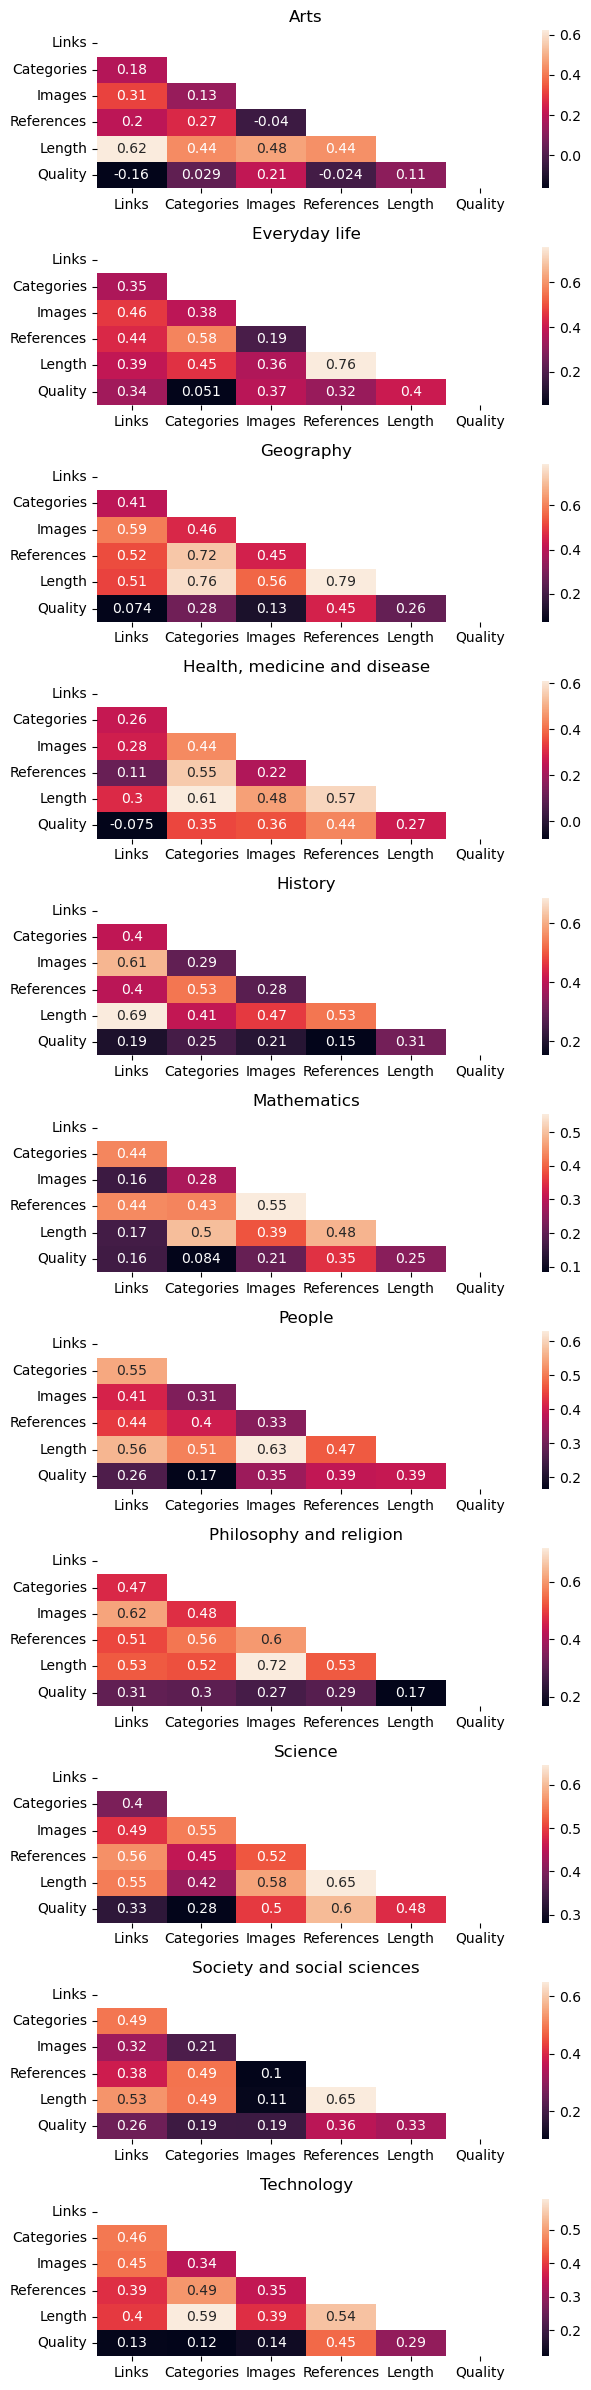

In [11]:
def corr_for_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category = df_filtered.corr()#numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category, dtype=bool))
    ax[i].set_title(category)
    sns.heatmap(corr_within_category, mask=mask, annot=True, ax=ax[i])

length = len(categories)
fig, ax = plt.subplots(length,1, figsize=(6.4, 24))
i = 0

# plt.figure(figsize=(6.4, 24))
for category in categories:
    corr_for_category(category)
    i+=1

plt.tight_layout()

In [12]:
# Science subset w every attribute
df_science = df.query("Theme == 'Science'")
df_science.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
645,Science,661,32,29,416,45955,3.0,Science
646,Scientific method,769,17,21,151,73762,3.0,Science
647,Measurement,304,16,10,38,20674,2.0,Science
648,International System of Units,681,31,19,195,58608,4.0,Science
649,Nature,746,22,59,207,37866,4.0,Science


In [13]:
df_arts_without_quality = df.query("Theme == 'Arts'")
df_arts_without_quality.drop(columns=["Quality"])
df_arts_without_quality.head()

,Title,Links,Categories,Images,References,Length,Quality,Theme
301,The arts,1055,23,33,83,21772,2.0,Arts
302,Art,519,30,36,256,57072,2.0,Arts
303,Prehistoric art,849,12,46,80,50775,2.0,Arts
304,Fashion,1548,31,26,104,54418,2.0,Arts
305,Museum,441,29,30,131,44326,2.0,Arts


In [14]:
df_without_quality = df.drop(columns=["Quality"])
df_without_quality.head()

,Title,Links,Categories,Images,References,Length,Theme
0,Hammurabi,1103,45,44,97,15484,People
1,Hatshepsut,755,49,18,97,33266,People
2,Ramesses II,662,43,25,119,32507,People
3,Cyrus the Great,515,61,32,213,47616,People
4,Alexander the Great,1910,71,75,401,89053,People


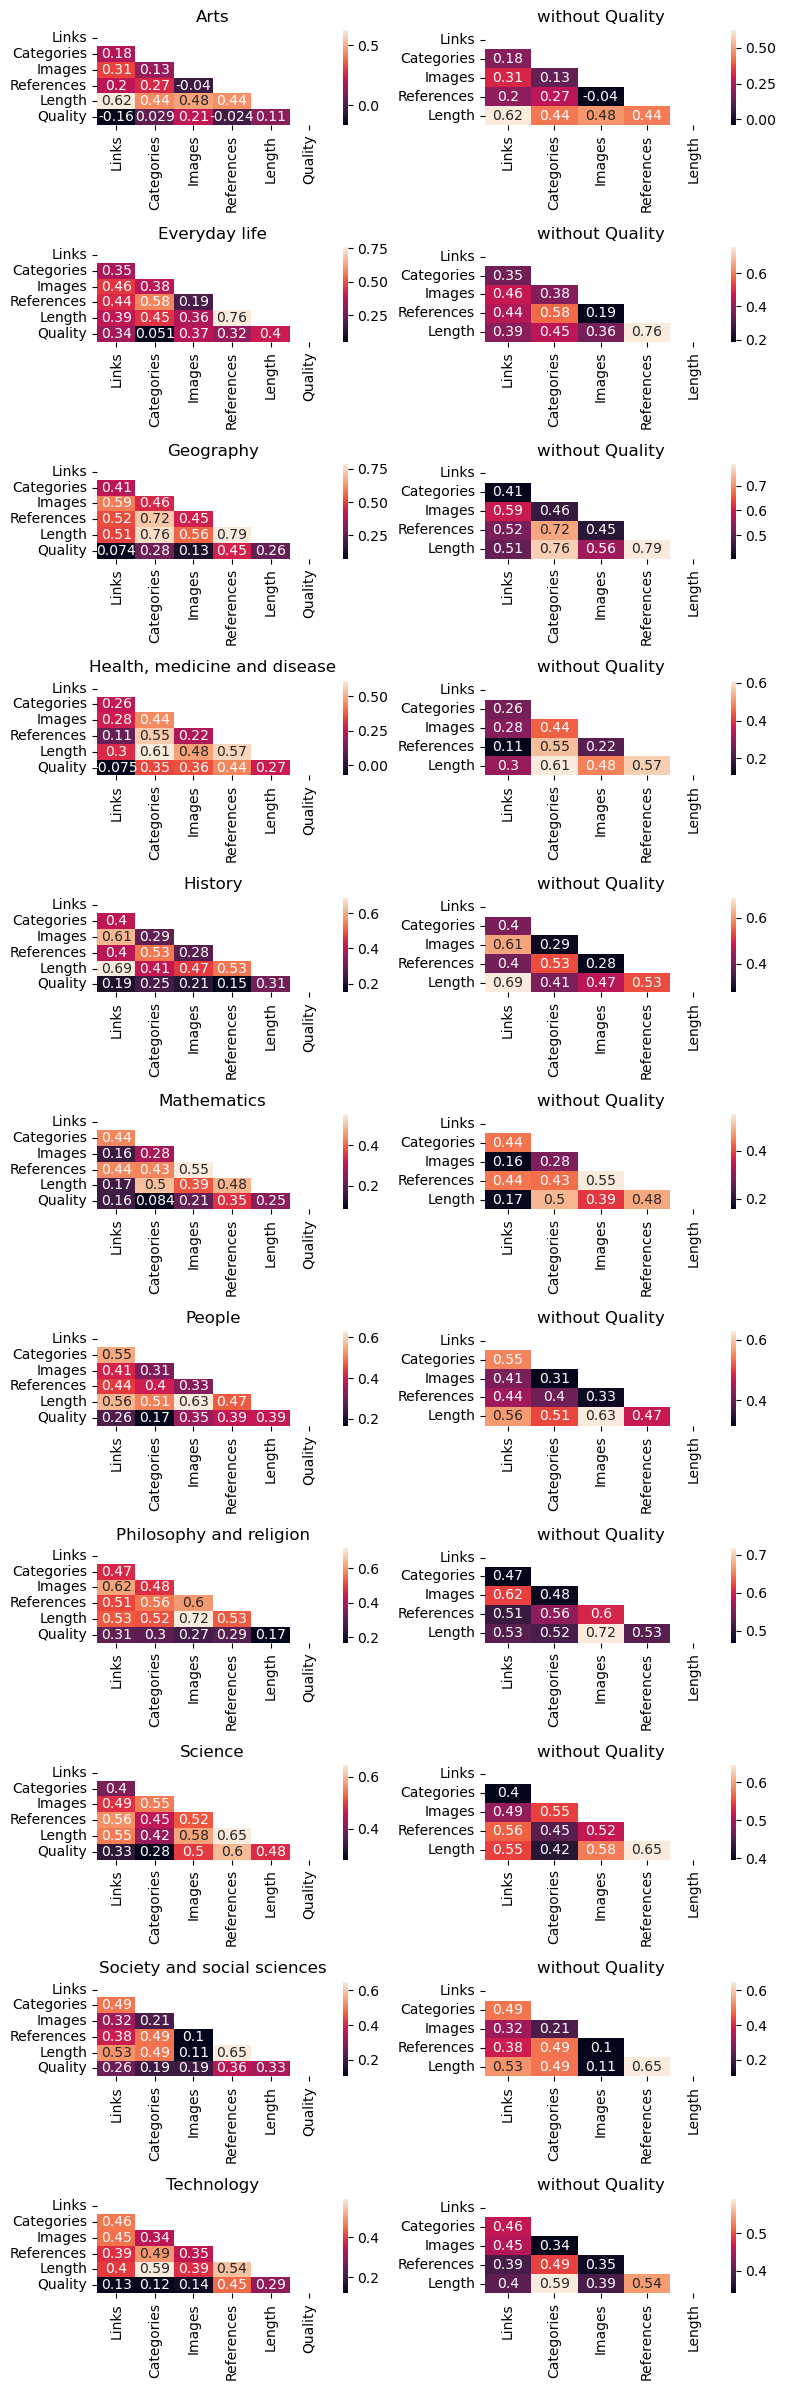

In [15]:
def corr_for_old_and_new_category(category):
    df_filtered = df.query(f"Theme == '{category}'")
    corr_within_category_for_df = df_filtered.corr()#numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df, dtype=bool))
    ax[i,0].set_title(category)
    sns.heatmap(corr_within_category_for_df, mask=mask, annot=True, ax=ax[i,0])

    df_filtered = df_without_quality.query(f"Theme == '{category}'")
    corr_within_category_for_df_filtered = df_filtered.corr()#numeric_only=True)
    mask = np.triu(np.ones_like(corr_within_category_for_df_filtered, dtype=bool))
    ax[i,1].set_title("without Quality")
    sns.heatmap(corr_within_category_for_df_filtered, mask=mask, annot=True, ax=ax[i,1])

length = len(categories)
fig, ax = plt.subplots(length,2, figsize=(8, 24))
i = 0

for category in categories:
    corr_for_old_and_new_category(category)
    i+=1

plt.tight_layout()

In [16]:
dfna = df.dropna() 
X = dfna.drop(columns=["Title","Theme"])
X.head()

,Links,Categories,Images,References,Length,Quality
0,1103,45,44,97,15484,4.0
1,755,49,18,97,33266,3.0
2,662,43,25,119,32507,2.0
3,515,61,32,213,47616,2.0
4,1910,71,75,401,89053,4.0


In [17]:
y = dfna["Theme"]
y.head()

0    People
1    People
2    People
3    People
4    People
Name: Theme, dtype: object

In [18]:
y_train_science = (y == 'Science') 
y_train_science.head()

0    False
1    False
2    False
3    False
4    False
Name: Theme, dtype: bool

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y_train_science)

sgd_clf.predict(X)

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [20]:
y_train_people = (y == 'People') 
y_train_people.head()

0    True
1    True
2    True
3    True
4    True
Name: Theme, dtype: bool

In [21]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y_train_people)

sgd_clf.predict(X)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X, y_train_science, cv=3, scoring="accuracy")

array([0.78978979, 0.20783133, 0.78915663])

In [23]:
from sklearn.base import BaseEstimator
class NeverscienceClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [24]:
never_science_clf = NeverscienceClassifier()
cross_val_score(never_science_clf, X, y_train_science, cv=3, scoring="accuracy")

array([1.        , 0.93975904, 0.43072289])

Confusion Matrix

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X, y_train_science, cv=3)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_science, y_train_pred)

array([[525, 263],
       [140,  69]], dtype=int64)

In [27]:
y_train_perfect_predictions = y_train_science  # pretend we reached perfection
confusion_matrix(y_train_science, y_train_perfect_predictions)

array([[788,   0],
       [  0, 209]], dtype=int64)

Presicion and recall

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_science, y_train_pred)

0.20783132530120482

In [29]:
recall_score(y_train_science, y_train_pred)

0.33014354066985646

In [30]:
from sklearn.metrics import f1_score

f1_score(y_train_science, y_train_pred)

0.25508317929759705

In [31]:
y_scores = sgd_clf.decision_function(X)
y_scores

array([-6.17826795e+07, -1.61890705e+08, -1.60945314e+08, -2.46231580e+08,
       -4.44495013e+08, -4.35696911e+08, -2.02611599e+08, -2.73423276e+08,
       -4.29233064e+08, -4.19152570e+08, -2.90374242e+08, -9.07693132e+07,
       -2.59914821e+08, -1.88850707e+08, -4.71956086e+08, -2.93868194e+08,
       -4.31486538e+08, -5.63538368e+08, -5.87120495e+08, -2.43694981e+08,
       -4.51208294e+08, -6.34665975e+08, -6.61427516e+08, -3.91905975e+08,
       -4.88550844e+08, -4.94118502e+08, -1.63352261e+08, -2.63255635e+08,
       -4.46530649e+08, -4.27181080e+08, -3.40470741e+08, -3.34040727e+08,
       -2.64208446e+08, -3.84995361e+08, -2.70461279e+08, -1.75279495e+08,
       -3.34557612e+08, -1.86319863e+08, -1.17441759e+08, -2.29682728e+08,
       -9.92611811e+07, -1.98341778e+08, -7.56036151e+07, -7.31353273e+07,
       -2.57279655e+08, -3.79651602e+08, -3.07369206e+08, -2.46436542e+08,
       -3.54723698e+08, -1.67448110e+08, -2.53508645e+08, -2.17404269e+08,
       -1.70054408e+08, -

In [32]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [33]:
y_some_digit_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [34]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
y_scores = cross_val_predict(sgd_clf, X, y_train_science, cv=3,
                             method="decision_function")

In [36]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_science, y_scores)

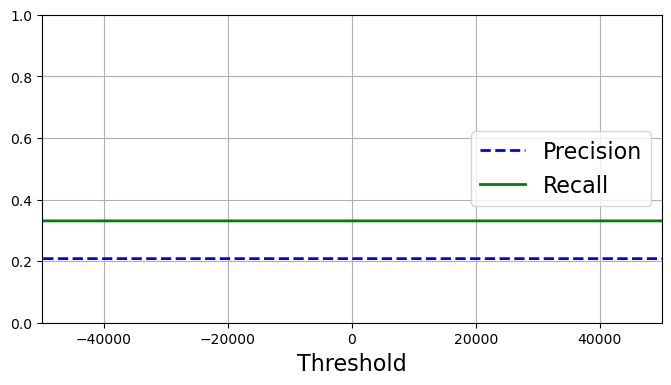

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions <= 0.9)]
threshold_90_precision = thresholds[np.argmax(precisions <= 0.9)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [38]:
(y_train_pred == (y_scores > 0)).all()

True

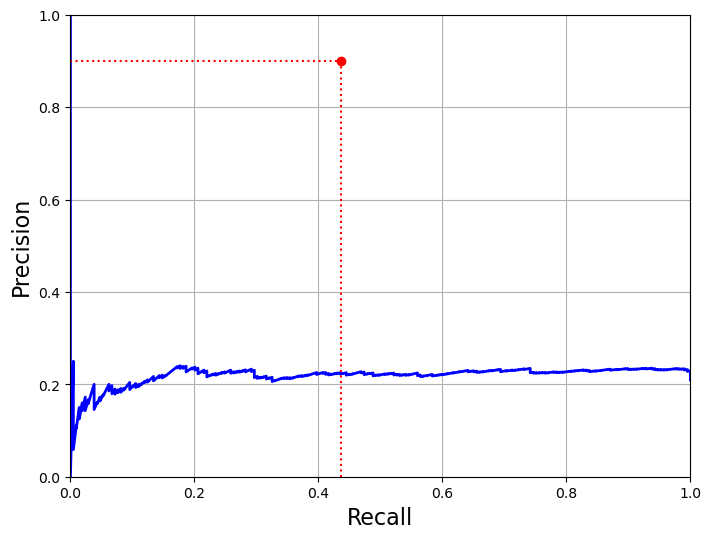

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [40]:
threshold_90_precision = thresholds[np.argmax(precisions <= 0.90)]

In [41]:
threshold_90_precision

-2354549973.1485667

In [42]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [43]:
precision_score(y_train_science, y_train_pred_90)

0.20962888665997995

In [44]:
recall_score(y_train_science, y_train_pred_90)

1.0

The ROC curves

In [45]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_science, y_scores)

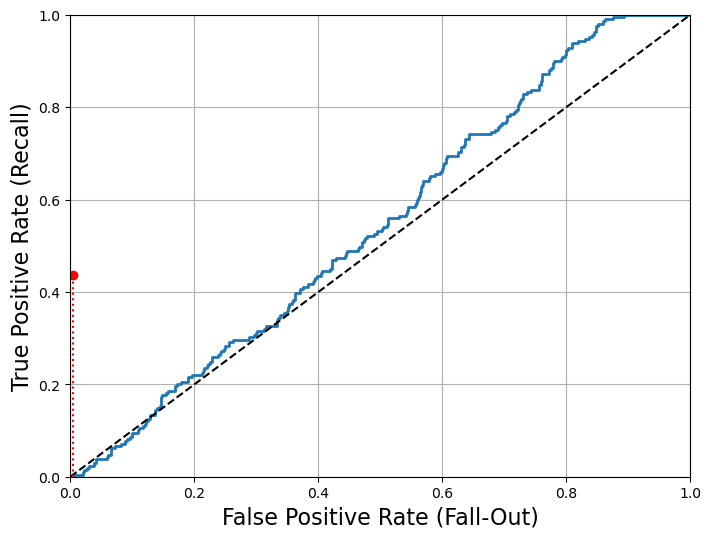

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_science, y_scores)

0.5458492215772472

In [49]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X, y_train_science, cv=3,
                                    method="predict_proba")

In [50]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_science,y_scores_forest)

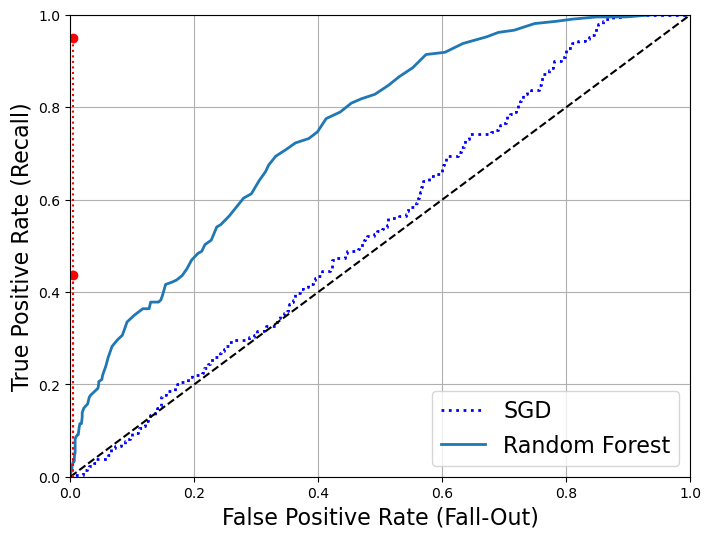

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, X, y_train_science, cv=3)
precision_score(y_train_science, y_train_pred_forest)

0.4523809523809524

In [55]:
y_train_pred_forest = cross_val_predict(forest_clf, X, y_train_science, cv=3)
precision_score(y_train_science, y_train_pred_forest)

0.4523809523809524

In [56]:
recall_score(y_train_science, y_train_pred_forest)

0.36363636363636365